In [1]:
import pandas as pd
#Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv('bestsellers with categories.csv')
print(df)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [79]:
#Виведіть перші п'ять рядків (використовується функція head)
df.head(5)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
#Виведіть розміри датасету (використовуйте атрибут shape)
print(f"Про скільки книг зберігає дані датасет? Відповідь: {df.shape[0]}")

Про скільки книг зберігає дані датасет? Відповідь: 550


In [4]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [5]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
df.isna().sum()/len(df)

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

In [6]:
#Чи є в якихось змінних пропуски? Відповідь: Ні

In [7]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
print(f"Які є унікальні жанри? Відповідь: {pd.unique(df['genre'])}")

Які є унікальні жанри? Відповідь: ['Non Fiction' 'Fiction']


<AxesSubplot:ylabel='Frequency'>

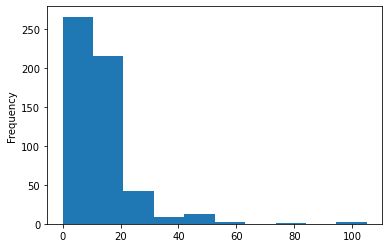

In [8]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
import seaborn as sns
df['price'].plot(kind="hist")

In [9]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
print(f"Максимальна ціна? Відповідь: {df['price'].max()}")
print(f"Мінімальна ціна? Відповідь: {df['price'].min()}")
print(f"Середня ціна? Відповідь: {df['price'].mean()}")
print(f"Медіанна ціна? Відповідь: {df['price'].median()}")

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


In [10]:
#Пошук та сортування даних
print(f"Який рейтинг у датасеті найвищий? Відповідь: {df['user_rating'].max()}")
print(f"Скільки книг мають такий рейтинг? Відповідь: {df['user_rating'].value_counts()[df['user_rating'].max()]}")
print(f"Яка книга має найбільше відгуків? Відповідь:\n{df[df['reviews']==df['reviews'].max()]}")

Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 52
Яка книга має найбільше відгуків? Відповідь:
                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


In [11]:
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
def select_columns(data_frame, column_names):
    return data_frame.loc[:, column_names]
selected_columns = ['name', 'author', 'price', 'year' ]
tables_new = select_columns(df, selected_columns)
tables_2015 = tables_new.loc[tables_new['year'] == 2015]
tables_2015[tables_2015['price']==tables_2015['price'].max()]

,name,author,price,year
277,Publication Manual of the American Psychologic...,American Psychological Association,46,2015


In [12]:
print(f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: {df.loc[(df['year']==2010) & (df['genre']=='Fiction')].shape[0]}")
print(f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: {df.loc[((df['year']==2010 | 2011) & (df['user_rating']==4.9))].shape[0]}")

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1


In [13]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
sort_vls = df.loc[(df['year']==2015) & (df['price']<8)].sort_values(by='price')
print(sort_vls)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [14]:
print(f"Яка книга остання у відсортованому списку? Відповідь: {sort_vls.tail(1)}")

Яка книга остання у відсортованому списку? Відповідь:                                       name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


In [15]:
#Агрегування даних та з'єднання таблиць
print(f"Максимальна ціна для жанру Fiction: Відповідь {df[df['genre'] == 'Fiction']['price'].max()}")
print(f"Мінімальна  ціна для жанру Fiction: Відповідь {df[df['genre'] == 'Fiction']['price'].min()}")
print(f"Максимальна ціна для жанру Non Fiction: Відповідь {df[df['genre'] == 'Non Fiction']['price'].max()}")
print(f"Мінімальна ціна для жанру Non Fiction: Відповідь {df[df['genre'] == 'Non Fiction']['price'].min()}")

Максимальна ціна для жанру Fiction: Відповідь 82
Мінімальна  ціна для жанру Fiction: Відповідь 0
Максимальна ціна для жанру Non Fiction: Відповідь 105
Мінімальна ціна для жанру Non Fiction: Відповідь 0


In [42]:
def select_columns(data_frame, column_names):
    return data_frame.loc[:, column_names]
selected_columns = ['name', 'author']
new_df = select_columns(df, selected_columns)
group_new_df = new_df.groupby(['author']).count()

In [17]:
print(f"Якої розмірності вийшла таблиця? Відповідь: {group_new_df.shape}")
print(f"Який автор має найбільше книг? Відповідь:\n{group_new_df[group_new_df['name']==group_new_df['name'].max()]}")
print(f"Скільки книг цього автора? Відповідь: {group_new_df[group_new_df['name']==group_new_df['name'].max()]}")

Якої розмірності вийшла таблиця? Відповідь: (248, 1)
Який автор має найбільше книг? Відповідь:
             name
author           
Jeff Kinney    12
Скільки книг цього автора? Відповідь:              name
author           
Jeff Kinney    12


In [43]:
def select_columns1(data_frame, column_names):
    return data_frame.loc[:, column_names]
selected_columns1 = ['author', 'user_rating']
df1 = select_columns1(df, selected_columns1)
group_df1 = df1.groupby(['author']).mean().round(1)

In [40]:
print(f"У якого автора середній рейтинг мінімальний? Відповідь:\n{group_df1[group_df1['user_rating']==group_df1['user_rating'].min()]}")
print(f"Який у цього автора середній рейтинг? Відповідь:\n{group_df1[group_df1['user_rating']==group_df1['user_rating'].min()]}")

У якого автора середній рейтинг мінімальний? Відповідь:
             user_rating
author                  
Donna Tartt          3.9
Який у цього автора середній рейтинг? Відповідь:
             user_rating
author                  
Donna Tartt          3.9


In [48]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
full_df = pd.concat([group_new_df, group_df1], axis=1)
full_df = full_df.sort_values(by=['name', 'user_rating'])
print(full_df)

                                    name  user_rating
author                                               
Muriel Barbery                         1          4.0
Chris Cleave                           1          4.1
Ian K. Smith M.D.                      1          4.1
Pierre Dukan                           1          4.1
Elizabeth Strout                       1          4.2
...                                  ...          ...
American Psychological Association    10          4.5
Gary Chapman                          11          4.7
Suzanne Collins                       11          4.7
Rick Riordan                          11          4.8
Jeff Kinney                           12          4.8

[248 rows x 2 columns]


In [62]:
print(f"Який автор перший у списку? Відповідь:\n{full_df.head(1)}")

Який автор перший у списку? Відповідь:
                name  user_rating
author                           
Muriel Barbery     1          4.0
